In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# <p style="font-family:arvo">1. Basic LP problem

<p style="font-family:arvo">
$A$ is $mxn$ matrix and $b$ is $mx1$ matrix.


Our objective function is to 

<center>
Minimize: $(AX - b)^2$
</center>

subject to the constraints 
<center>
    $0 \leq X \leq 1$
</center>

Solve for $X$

In [2]:
# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

### <p style="font-family:arvo">We need to solve for $x$

In [3]:
x = cp.Variable(n)

### <p style="font-family:arvo">Minimizing the objective

In [4]:
objective = cp.Minimize(cp.sum_squares(A*x - b))

### <p style="font-family:arvo">Defining constraints

In [5]:
constraints = [x >= 0, x <= 1]
prob = cp.Problem(objective, constraints)

### <p style="font-family:arvo">The optimal objective is returned by prob.solve()

In [6]:
result = prob.solve()
print("Solution is:", prob.status)
print("Minimum Objective value is:", result)

Solution is: optimal
Minimum Objective value is: 19.83126370644502


### <p style="font-family:arvo">The optimal value for x is stored in x.value

In [7]:
print(x.value)

[-1.79109253e-19  2.85112420e-02  2.79973443e-19  3.37658751e-20
 -2.72802659e-19  1.49285011e-01 -9.97212062e-20  8.35373892e-20
  2.46718649e-01  5.78224144e-01 -4.03739462e-19  1.01242860e-03
 -9.28486200e-20  2.26767464e-01 -1.58813677e-19 -8.97232308e-20
 -1.22145726e-19 -1.51509432e-19  1.12060673e-19 -3.48318630e-19]


# <p style="font-family:arvo">2. Knapsack Problem

<p style="font-family:arvo">
<center>
$\max$ $\sum_{i}$ $x_{i} * c_{i}$ 
</center>
<br>
<b>subject to constraints-</b>
<br>
<center>
$\sum_{i}$ $x_{i} * w_{i}$ $\leq W$ where $W$ is maximum weight
<br>
$x_{i} \in$ {0,1}
</center>
</p>

### <p style="font-family:arvo">$W$ = 165 units

In [8]:
totalWeight = 165

### <p style="font-family:arvo">Specifying Constraints

### <p style="font-family:arvo">weights : weights$_{i}$ denotes weight of $i^{th}$ item

In [9]:
weights = np.array([23, 31, 29, 44, 53, 38, 63, 85, 89, 82])
len(weights)

10

### <p style="font-family:arvo">cost: cost$_{i}$ denotes cost of $i^{th}$ item

In [10]:
cost = np.array([92, 57, 49, 68, 60, 43, 67, 84, 87, 72])
len(cost)

10

### <p style="font-family:arvo"> take: take$_{i}$ denotes whether we are taking $i^{th}$ item or not, boolean variable

In [11]:
take = cp.Variable(len(weights),boolean=True)
take

Variable((10,), boolean=True)

### <p style="font-family:arvo">Weight Constraint:  Total weight in bag <= totalWeight

In [12]:
weight_constraint = [weights * take <= totalWeight]

### <p style="font-family:arvo">Total cost for all the items present in the bag, need to maximize total_cost

In [13]:
total_cost = cost * take

### <p style="font-family:arvo">Defining problem in cvxpy

In [14]:
knapsack_problem = cp.Problem(cp.Maximize(total_cost), weight_constraint)

### <p style="font-family:arvo">Using cvxpy to solve the problem and also mentioning solver for Integer Programming Problems, return maximum value of the objective

In [15]:
knapsack_problem.solve(solver=cp.GLPK_MI)

309.0

### <p style="font-family:arvo">take$_{i}$ = 1, represents that we need to take $i^{th}$ item, otherwise don't take the item

In [16]:
print(take.value)

[1. 1. 1. 1. 0. 1. 0. 0. 0. 0.]


# <p style="font-family:arvo">3. Line Fitting Problem
<br>
Our objective function is - 
<center>
    $\min$ $\sum_{i} (y_{i} - (m * x_{i} + c))^2$
</center>
### <p style="font-family:arvo">This is an unconstrained optimization problem

### <p style="font-family:arvo">The number of data points are 50

In [17]:
np.random.seed(0)
num = 50

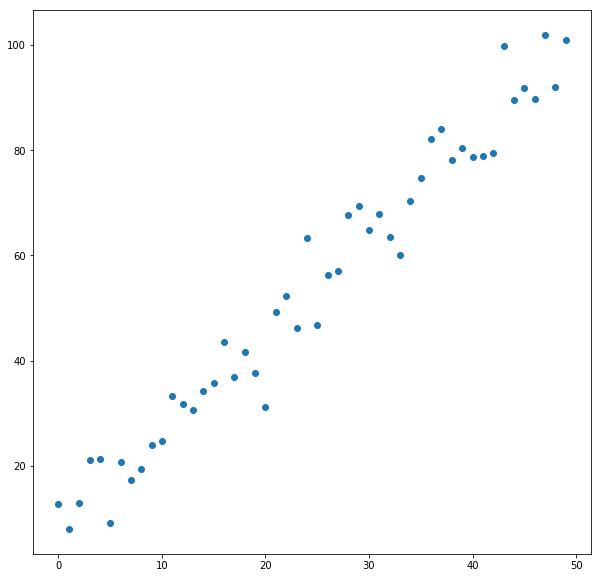

In [18]:
x = np.arange(num)
y = 2*x+4 + 5*np.random.randn(num,)

plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.show()

### <p style="font-family:arvo">The variables $m$ and $c$ are defined

In [19]:
m = cp.Variable()
c = cp.Variable()

### <p style="font-family:arvo">Objective function is posed as problem

In [20]:
objective = cp.Minimize(cp.sum((y - (m*x+c))**2))
prob = cp.Problem(objective)

In [21]:
result = prob.solve()
print("Optimal value is: ",result)

Optimal value is:  1367.4594036601761


In [22]:
print("The values of m is {} and c is {}".format(m.value, c.value))

The values of m is 1.855956888470389 and c is 8.231852594040959


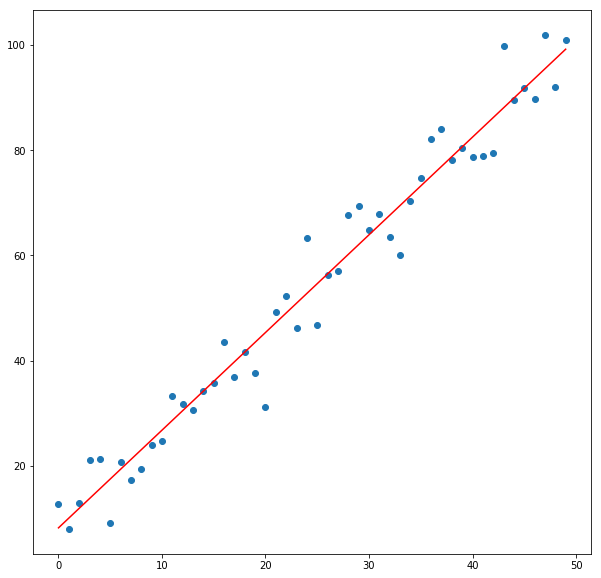

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.plot(x, m.value * x + c.value, 'r')
plt.show()

# <p style="font-family:arvo">4. Min vertex cover

<p style="font-family:arvo">The objective function is defined as - 
<center>
$\min \sum_{u} x_{u} , \forall u \in V$
</center>
<p style="font-family:arvo">subject to constraints - 
<center>
    $x_{u} + x_{v} \geq 1, \forall u, v \in E$
    <br>
    $x_{u} \in $ {0,1}
</center>

![](graph.png)

### <p style="font-family:arvo">The above graph has 6 vertices and 7 edges.

In [24]:
e = 7
v = 6
edges = [(1,2), (1,3), (2,3), (2,4), (3,5), (4,5), (4,6)]

### <p style="font-family:arvo">The variable $x$ , objective function and constraints are defined

In [25]:
x = cp.Variable(v, boolean=True)

In [26]:
objective = cp.Minimize(cp.sum(x))

In [27]:
constraints = [x[i-1]+x[j-1]>=1 for (i,j) in edges]

### <p style="font-family:arvo">Using cvxpy solving the problem

In [28]:
prob = cp.Problem(objective, constraints)

In [29]:
result = prob.solve(solver=cp.GLPK_MI)

In [30]:
print("The minimum value of the objective function is :", result)
print("The minimum vertex cover is :", np.sum(x.value == 1.0))

The minimum value of the objective function is : 3.0
The minimum vertex cover is : 3


### <p style="font-family:arvo">The values in $x$ which correspond to 1 are included in minimum vertex cover

In [31]:
x.value

array([0., 1., 1., 1., 0., 0.])